              Player      ID      Country
0  Gulbadin Naib (c)  352048  Afghanistan
1   Rashid Khan (vc)  793463  Afghanistan
2         Aftab Alam  440963  Afghanistan
3      Asghar Afghan  320652  Afghanistan
4      Dawlat Zadran  516561  Afghanistan
-----------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Player   152 non-null    object
 1   ID       152 non-null    int64 
 2   Country  152 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.7+ KB
None
-----------------------------------------------------------------------------------
(152, 3)
-----------------------------------------------------------------------------------
   Unnamed: 0 Result    Margin  BR  Toss  Bat   Opposition     Ground  \
0         418    won   85 runs NaN  lost  1st      v India    Kolkata 

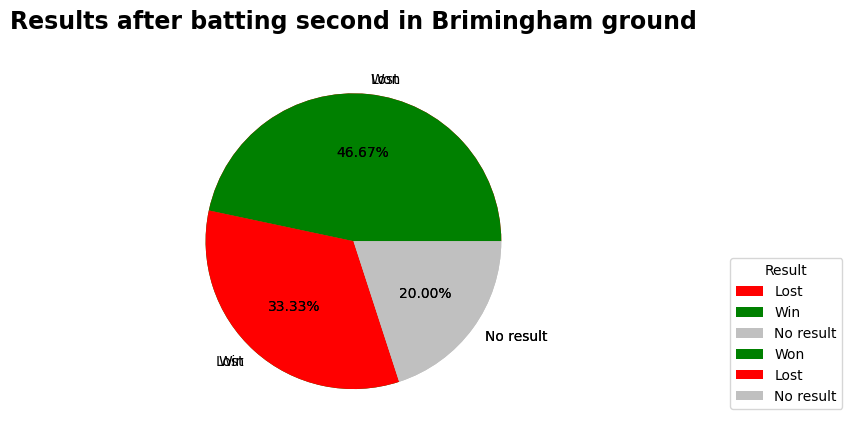

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
Ground_Avg = '/content/WC_players.csv'
Ground_Match_Result =  '/content/ODI_Match_Results.csv'
Ground_Match_Total = '/content/ODI_Match_Totals.csv'
#Reading the dataset into 3 different variables
df1 = pd.read_csv(Ground_Avg)
df2 = pd.read_csv(Ground_Match_Result)
df3 = pd.read_csv(Ground_Match_Total)
print(df1.head())
print("-----------------------------------------------------------------------------------")
print(df1.info())
print("-----------------------------------------------------------------------------------")
print(df1.shape)
print("-----------------------------------------------------------------------------------")
print(df2.head())
print("-----------------------------------------------------------------------------------")
print(df2.info())
print("-----------------------------------------------------------------------------------")
print(df2.shape)
print("-----------------------------------------------------------------------------------")
print(df3.head())
print("-----------------------------------------------------------------------------------")
print(df3.info())
print("-----------------------------------------------------------------------------------")
print(df3.shape)
print("-----------------------------------------------------------------------------------")
common = set.intersection(set(df2['Start Date']), set(df3['Start Date']))
df = pd.concat([
    df2[df2['Start Date'].isin(common)],
    df3[df3['Start Date'].isin(common)]]).sort_values(by='Start Date')
df.head()
#understanding the dataframe better, to see how many null columns etc
df.info()
df.head()
#Gruping required columns for problem 1  in one dataframe
#The null values have reduced and hence the null columns can be dropped
prob1_var = df[['Toss', 'Result', 'Ground']]
prob1_var.dropna()
#Grouping the data together according to the required Stadium
prob1 = prob1_var.query('Ground == "The Oval"')
prob1.info
#Gathering only the winning results from the dataframe
tempvar = prob1.loc[prob1['Result']=='won']
tvar = tempvar['Toss'].value_counts()
tvar
#this tells us that, at the oval, we More number of teams have won the match if they have won the toss
#We will load the data again, so we don't have to scroll up all the time
df.head()
#We will again group the data according to Birmingham
prob2 = df[['Bat', 'Ground', 'Opposition', 'Result']]
prob2.head()
#Dropping Null Values
prob2.dropna()
#Grouping According to one ground
prob2 = prob2.query('Ground == "Birmingham"')
prob2
#Grouping according to whoever batted first
prob2_b1 = prob2.loc[prob2['Bat']=='1st']
prob2_b1['Result'].value_counts()
#plotting the graph
fig = figsize =(30, 20)
label = ['Lost', 'Win', 'No result']
colors = ['red', 'green', 'silver']
plt.pie(prob2_b1['Result'].value_counts(), autopct='%1.2f%%', labels=label, textprops = dict(color ="black"), colors=colors)
plt.title('Results after batting first in Brimingham ground', size = 17, weight ="bold", pad=20)
plt.legend(title ="Result", loc ="center left", bbox_to_anchor =(1.5, 0, 0.5, 0.5))
#Grouping the data according to second batting
prob2_b2 = prob2.loc[prob2['Bat']=='2nd']
#Counting how many of these second batters have won and lost
prob2_b2['Result'].value_counts()
fig = figsize =(30, 20)
label = ['Won', 'Lost', 'No result']
colors = ['green', 'red', 'silver']
plt.pie(prob2_b1['Result'].value_counts(), autopct='%1.2f%%', labels=label, textprops = dict(color ="black"), colors=colors)
plt.title('Results after batting second in Brimingham ground', size = 17, weight ="bold", pad=20)
plt.legend(title ="Result", loc ="center left", bbox_to_anchor =(1.5, 0, 0.5, 0.5))